# Machine Learning Engineer Nanodegree
## Deep Learning
## Project: Build a Digit Recognition Program

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [6]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os as os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import PIL
from PIL import Image, ImageFilter
from scipy import misc
import random
import pandas as pd
import tensorflow as tf
import h5py
import math
import matplotlib.patches as patches


----
## Step 1: Design and Test a Model Architecture
Design and implement a deep learning model that learns to recognize sequences of digits. Train the model using synthetic data generated by concatenating character images from [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) or [MNIST](http://yann.lecun.com/exdb/mnist/). To produce a synthetic sequence of digits for testing, you can for example limit yourself to sequences up to five digits, and use five classifiers on top of your deep network. You would have to incorporate an additional ‘blank’ character to account for shorter number sequences.

There are various aspects to consider when thinking about this problem:
- Your model can be derived from a deep neural net or a convolutional network.
- You could experiment sharing or not the weights between the softmax classifiers.
- You can also use a recurrent network in your deep neural net to replace the classification layers and directly emit the sequence of digits one-at-a-time.

Here is an example of a [published baseline model on this problem](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf). ([video](https://www.youtube.com/watch?v=vGPI_JvLoN0))

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### see "STEP-1_digit_recognition-training-syntheticdataset.ipynb"

### Question 1
_What approach did you take in coming up with a solution to this problem?_

**Answer:** 

After reading the paper by Goodfellow, I figured the best way was to have a 'simple' feedforward CNN with five softmax classifiers (for each digit).  I chose to use convolutional layers becuause they are ideal for learning from images.  The convolution operator, essentailly extracts features from the images while preserving the spatial relationship between the pixels.  These features can the be used to in the final fully connected layer for classification.  I chose to use as deep a network as possible/practical with my hardware (3 CNN, and 8 later on). 

I chose to use the AdamOptimizer instead of gradient descent.  GD has the propensity to get stuck in local minima during optimization while Adam essentially uses a moving average /momentum of the parameters.  this has been shown to be advantageous for convergence on an optimal solution.

### Question 2
_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)_

**Answer:**

My architecture is as follows:

data (batch, 64, 64, 1) 64x64 image in greyscale

Then 3 Convolutional Layers, hidden relu layer and maxpooling between each

Then I reshape the data and feed directly into a fully connected layers for each digit and then to the individual logits for each digit.

Not as deep, but similar to goodfellow et al

### Question 3
_How did you train your model? How did you generate your synthetic dataset?_ Include examples of images from the synthetic data you constructed.

**Answer:**

The examples are in the file.  I created a synthetic dataset by randomly mixing digits from the MNIST dataset,  then resizing them into square 64x64 greyscale images.  The images had random lengths from 1-5 digits.

I trained the model using ~20K-100K steps.  I minimized the loss fucntion from the 5 classifiers using the AdamOptimizer().  I found that the learning rate most affected the performace with an optimal value around 1e-4. I chose a batch size of 16 for each trial run and the model trained in a reasonable amount of time.  Anything larger by a factor of 10 or so resultted in extremely slow training and was not practical. 

I achieved reasonable accuracy on my test_set:

digit  1 :  0.9

digit  2 :  0.777777777778

digit  3 :  0.8

digit  4 :  0.731707317073

digit  5 :  0.826086956522

**Now here is an example of the model and its prediction on a synthetic concatentated digit from MNIST**
> Note that 10's are blank spaces

[ 5  5 10 10 10]


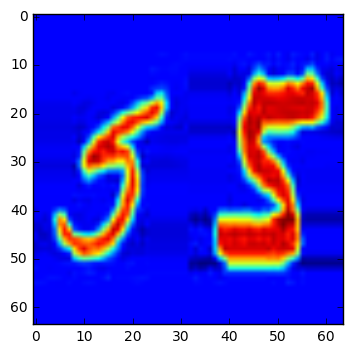

In [4]:
import STEP1_Model_Predict as model
file_names = ['mnist_concat_1.jpg']
for i in file_names:
    model.predict_show(i, '/STEP1_model.ckpt')

The purpose here was just to get everything in the right place and to get a reasonable working model to expand upon.

----
## Step 2: Train a Model on a Realistic Dataset
Once you have settled on a good architecture, you can train your model on real data. In particular, the [Street View House Numbers (SVHN)](http://ufldl.stanford.edu/housenumbers/) dataset is a good large-scale dataset collected from house numbers in Google Street View. Training on this more challenging dataset, where the digits are not neatly lined-up and have various skews, fonts and colors, likely means you have to do some hyperparameter exploration to perform well.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### see:

### "STEP-2_2_digit_recognition-SVHNcleaning.ipynb"  AND
### "STEP-2_2_digit_recognition-SVHNtraining.ipynb"


### Question 4
_Describe how you set up the training and testing data for your model. How does the model perform on a realistic dataset?_

**Answer:**

I first cleaned the data.  I cropped the images with the bounding boxes, made greyscale and then normalized.  I used the same train and test set from the SVHN tar balls (format 1). For the SVHN I used 8 CNN layers, I assumed a deeper network would perform better. 

For each iteration of the training, I recorded the loss and chose parameters that optimally minimized the loss function.  Mostly this was tuning the learning rate.  A learning rate that is too large, I noticed started well(descended fast) but didn't converge.  And in instances where the learning was too small, the loss value decreased very slowly - thus there was a sweet spot.

Also I chose batch sizes, that were large enoouhg to get a sense of the performance with each iteration (batch size  = 16) while small enough to where the model still trained in a reasonable amount of time.

Finally, I used a subset of the test data (n = 500) to evaluate the accuracy of the model that was trained with different empirically chosen parameters.  I felt this was large enough to get a sense of how well the model performed on data that was not used in training.  I didn't use the validation set.  I felt by inspecting the accuracy of the minibatches was significant.  For some reason (not surprisingly I guess), my model used an extremely large amount of memory and was very slow to predict large batches.  Thus I didn't use the validation set.

The model performs well as judged by the accuracy at each digit for a sample of the test set (n = 500) 

digit  1 :  0.754

digit  2 :  0.516

digit  3 :  0.804

digit  4 :  0.982

digit  5 :  1.0

However, for absolute accuracy, the model is only correct 36.6% of the time.  It seems to generally be close, but usually one digit is off.  I think with improvements to the overall architecture, possibly a deeper network etc., use of regularization etc. it would work better.  Clearly this is not sufficient for many real world applications.

### Question 5
_What changes did you have to make, if any, to achieve "good" results? Were there any options you explored that made the results worse?_

**Answer:**

I hadn't read all of the questions when I did this (e.g training of a localizer in paralell in step 4).  I achieved 'good' results with the same model but I added extra convolutional layers.  In goodfellow et al.  they used 8 so I used 8.  A major help was using the bounding boxies to crop, resize and normalize the images. Without this, the model performs very poorly. 

Also I adjusted the learning rate to find an optimal value.  That had biggest effect.  Changing the width of the layers seemed to have little effect (e.g. width versus depth. paradigm). Most of the other parameters had less of an effect.



### Question 6
_What were your initial and final results with testing on a realistic dataset? Do you believe your model is doing a good enough job at classifying numbers correctly?_

**Answer:**

see above

In comparing the model in step 1 with the model in step 2.  The synthetic data was much easier.  With a relatively small CNN I was able to accurately predict the digits in this dataset.  This was expected becuase the digits were from MNIST and all relatively similar.  For the SVHN, there was a greater variety of digits in this dataset.  As such, the model performed less well on these digits.  Without cropping of the SVHN digits the model did VERY poorly.

----
## Step 3: Test a Model on Newly-Captured Images

Take several pictures of numbers that you find around you (at least five), and run them through your classifier on your computer to produce example results. Alternatively (optionally), you can try using OpenCV / SimpleCV / Pygame to capture live images from a webcam and run those through your classifier.


- Model is implemented in **'STEP3_Model_Predict.py'**

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.


### Question 7
_Choose five candidate images of numbers you took from around you and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult?



**Answer:**

For the simple images, they were mostly just numbers.   

The first image was the 83 on my TI-83 calculator (image3.jpg) and the model predicted this very well.  The images got progressively harder.  

Next 'image1.png', which is a handwritten 59. The model predicted somewhat accurately, but had more trouble.  There are no digits like these in SVHN. e.g. handwritten.

Next were a series of much harder images.  Noticably with distractions (e.g. lebron james arms or jersey), or any image without the digit exactly in the center - the model performed very poorly.

Images are displayed in the output in question 8

### Question 8
_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the realistic dataset?_

[ 8  3 10 10 10]


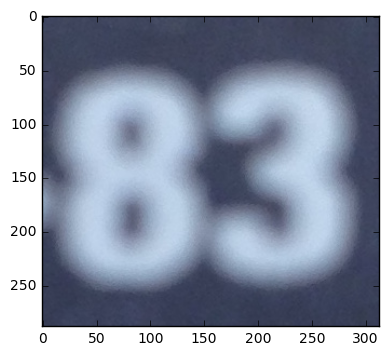

[ 5  9  1 10 10]


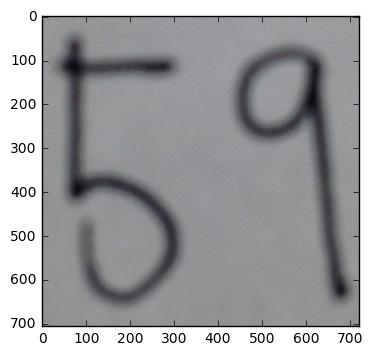

[ 3  2 10 10 10]


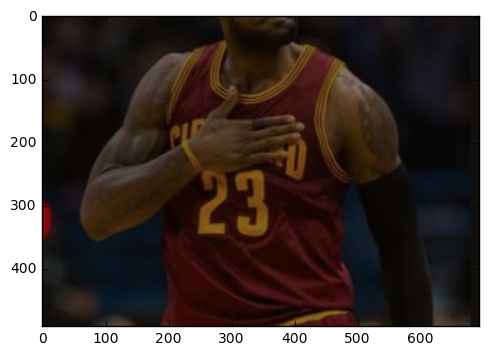

[ 2 10 10 10 10]


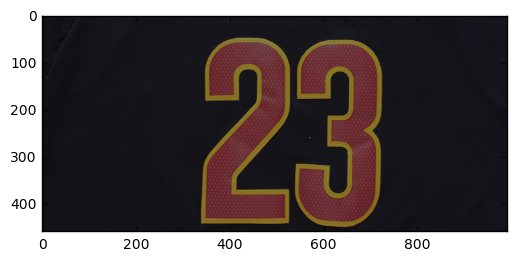

[ 2  4  1 10 10]


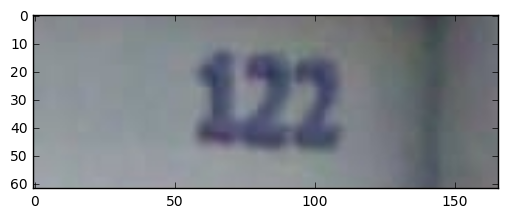

[ 4  5 10 10 10]


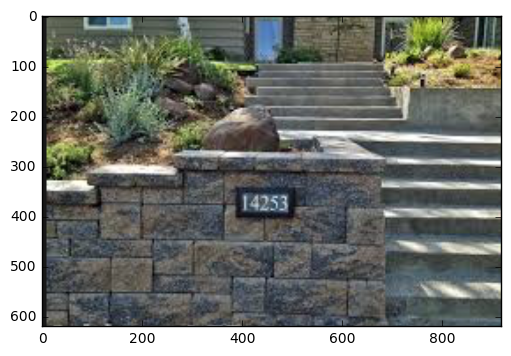

[ 1  0  7 10 10]


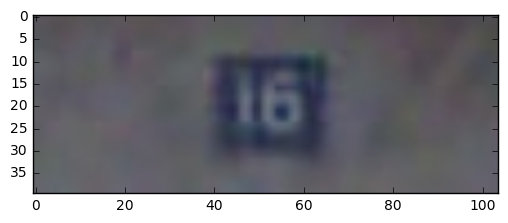

In [32]:
import STEP3_Model_Predict as model
file_names = ['image3.jpg', 'image1.jpg', 'image1.png', 'image2.png', 'image7.png', 'image9.png',  '22.png' ]
for i in file_names:
    model.predict_show(i, '/STEP2_2_model.ckpt')

**Answer:**

I'd say it was close, but definitely not as well. It was as good at predicting images that were cropped and prepared the same way as the training data.  Anything zoomed out, it performed terribly.

### Optional: Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._

**Answer:** Leave blank if you did not complete this part.

----
# Step 4: Explore an Improvement for a Model

There are many things you can do once you have the basic classifier in place. One example would be to also localize where the numbers are on the image. The SVHN dataset provides bounding boxes that you can tune to train a localizer. Train a regression loss to the coordinates of the bounding box, and then test it. 

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.


**For the last part, I just added my code into the report.  **

- First Loading data, then testing fidelity of a sample image and bounding box

/Users/jdschonhoft/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/jdschonhoft/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


bounding box:  [2.3703703703703702, 59.25925925925926, 17.723076923076924, 45.784615384615385]
image number:  38


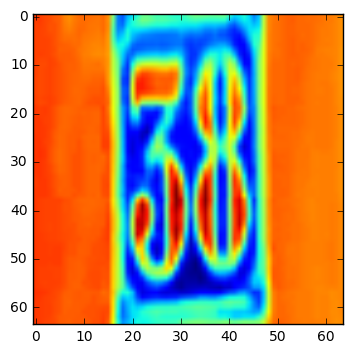

/Users/jdschonhoft/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


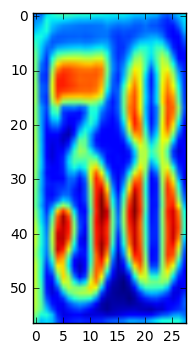

In [7]:
#loading data for part four
train_data = pickle.load( open( "train_data_part4.pickle", "rb" ) )
test_data = pickle.load( open( "test_data_part4.pickle", "rb" ) )

#remove images with 'nodata' from cleaning step
train_ = filter(lambda x: x[0] != 'nodata', train_data)
test_ = filter(lambda x: x[0] != 'nodata', test_data)

#removing data if digit greater than 5
train_ = filter(lambda x: len(x[1]) < 6, train_)
test_ = filter(lambda x: len(x[1]) < 6, test_)

#now testing fidelity of data
imgnumber = 861
bb = train_data[imgnumber][2]
print('bounding box: ', train_data[imgnumber][2])
print('image number: ', train_data[imgnumber][1])
plt.imshow(train_data[imgnumber][0])
plt.show()
plt.imshow(train_data[imgnumber][0][bb[0]:bb[1], bb[2] : bb[3]])
plt.show()

**Now formating data for tensorflow**

In [8]:
image_size = 64
# num_labels = 11  #0-9 + blank
num_channels = 1 # grayscale

#formating data
train_dataset = np.array(zip(*train_)[0]).astype(dtype=np.float32)
train_labels = np.array([[len(i)] + [int(k) for k in i] + [int(10)]*(5-len(i)) for i in zip(*train_)[1]])
train_bb = np.array([i for i in zip(*train_)[2]]).astype(dtype=np.float32) 

valid_dataset = np.array(zip(*train_)[0]).astype(dtype=np.float32)
valid_labels = np.array([[len(i)] + [int(k) for k in i] + [int(10)]*(5-len(i)) for i in zip(*train_)[1]])
valid_bb = np.array([i for i in zip(*train_)[2]]).astype(dtype=np.float32) 

test_dataset = np.array(zip(*test_)[0]).astype(dtype=np.float32)
test_labels = np.array([[len(i)] + [int(k) for k in i] + [int(10)]*(5-len(i)) for i in zip(*test_)[1]])
test_bb = np.array([i for i in zip(*test_)[2]]).astype(dtype=np.float32)

def reformat(dataset, labels, bbox):
    dataset = dataset.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
    return dataset, labels, bbox
train_dataset, train_labels, train_bbox = reformat(train_dataset, train_labels, train_bb)
valid_dataset, valid_labels, valid_bbox = reformat(valid_dataset, valid_labels, valid_bb)
test_dataset, test_labels, test_bbox = reformat(test_dataset, test_labels, valid_bb)

print('Training set', train_dataset.shape, train_labels.shape, train_bbox.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape, valid_bbox.shape)
print('Test set', test_dataset.shape, test_labels.shape, test_bbox.shape)

Training set (33234, 64, 64, 1) (33234, 6) (33234, 4)
Validation set (33234, 64, 64, 1) (33234, 6) (33234, 4)
Test set (13027, 64, 64, 1) (13027, 6) (33234, 4)


**Now training REGRESSION model for predicting bound boxes**

In [6]:

#parameters
batch_size = 20
image_size = 64
patch_size = 3

d1 = 4
d2 = 8
d3 = 16
d4 = 32
d5 = 64
d6 = 128
d7 = 256
d8 = 512
sdev = math.sqrt(2.0 / (32**2*1))


#tensorflow computational graph
graph = tf.Graph()
with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, image_size, image_size, 1))
    tf_train_bbox = tf.placeholder(tf.float32, shape=(batch_size,4))
    tf_eval = tf.placeholder(tf.float32,shape=(batch_size, image_size, image_size, 1))

    
    # Variables.
    conv1_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, 1, d1], stddev=sdev))
    conv1_b = tf.Variable(tf.zeros([d1]))
    
    conv2_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d1, d2], stddev=sdev))
    conv2_b = tf.Variable(tf.zeros([d2]))
    
    conv3_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d2, d3], stddev=sdev))
    conv3_b = tf.Variable(tf.zeros([d3]))
    
    conv4_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d3, d4], stddev=sdev))
    conv4_b = tf.Variable(tf.zeros([d4]))
    
    conv5_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d4, d5], stddev=sdev))
    conv5_b = tf.Variable(tf.zeros([d5]))
    
    conv6_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d5, d6], stddev=sdev))
    conv6_b = tf.Variable(tf.zeros([d6]))
    
    conv7_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d6, d7], stddev=sdev))
    conv7_b = tf.Variable(tf.zeros([d7]))
    
    conv8_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d7, d8], stddev=sdev))
    conv8_b = tf.Variable(tf.zeros([d8]))
    
    fc1_w = tf.Variable(tf.truncated_normal([128,512], stddev=0.1))
    fc1_b = tf.Variable(tf.constant(1.0, shape=[64]))

    #for final logits
    hidden2 = 512
    b1_w = tf.get_variable('b1_w', shape=[hidden2, 1],initializer=tf.contrib.layers.xavier_initializer())
    b1_b = tf.Variable(tf.constant(1.0, shape=[1]))
    b2_w = tf.get_variable('b2_w',shape=[hidden2, 1],initializer=tf.contrib.layers.xavier_initializer())
    b2_b = tf.Variable(tf.constant(1.0, shape=[1]))
    b3_w = tf.get_variable('b3_w',shape=[hidden2, 1],initializer=tf.contrib.layers.xavier_initializer())
    b3_b = tf.Variable(tf.constant(1.0, shape=[1]))
    b4_w = tf.get_variable('b4_w',shape=[hidden2, 1],initializer=tf.contrib.layers.xavier_initializer())
    b4_b = tf.Variable(tf.constant(1.0, shape=[1]))

    # Model.
    def model(data):
        '''
        Our best architecture consists of eight convolutional hidden layers
        one locally connected hidden layer, and two densely connected hidden layers.
        All connections are feedforward and go from one layer to the next (no skip connections).
        The first hidden layer contains maxout units (Goodfellow et al., 2013) (with three filters per unit)
        while the others contain rectifier units (Jarrett et al., 2009; Glorot et al., 2011). 
        The number of units at each spatial location in each layer is [48, 64, 128, 160] 
        for the first four layers and 192 for all other locally connected layers. 
        The fully connected layers contain 3,072 units each. 
        Each convolutional layer includes max pooling and subtractive normalization. 
        The max pooling window size is 2 × 2. 
        The stride alternates between 2 and 1 at each layer, 
        so that half of the layers don’t reduce the spatial size of the representation. 
        All convolutions use zero padding on the input to preserve representation size. 
        The subtractive normalization operates on 3x3 windows and preserves representation size. 
        All convolution kernels were of size 5 × 5. 
        We trained with dropout applied to all hidden layers but not the input.
        '''
        pad  = 'SAME'
        conv1 = tf.nn.conv2d(data, conv1_w, [1, 1, 1, 1], padding=pad)
        conv1 = tf.nn.relu(conv1 + conv1_b)
        conv1 = tf.nn.max_pool(conv1, [1,2,2,1], [1,2,2,1], padding=pad)
#         print(conv1.get_shape())
        conv2 = tf.nn.conv2d(conv1, conv2_w, [1, 1, 1, 1], padding=pad)
        conv2 = tf.nn.relu(conv2 + conv2_b)
        conv2 = tf.nn.max_pool(conv2, [1,2,2,1], [1,2,2,1], padding=pad)
#         print(conv2.get_shape())
        conv3 = tf.nn.conv2d(conv2, conv3_w, [1, 1, 1, 1], padding=pad)
        conv3 = tf.nn.relu(conv3 + conv3_b)
        conv3 = tf.nn.max_pool(conv3, [1,2,2,1], [1,2,2,1], padding=pad)
#         print(conv3.get_shape())
        conv4 = tf.nn.conv2d(conv3, conv4_w, [1, 1, 1, 1], padding=pad)
        conv4 = tf.nn.relu(conv4 + conv4_b)
        conv4 = tf.nn.max_pool(conv4, [1,2,2,1], [1,2,2,1], padding=pad)
#         print(conv4.get_shape())
        conv5 = tf.nn.conv2d(conv4, conv5_w, [1, 1, 1, 1], padding=pad)
        conv5 = tf.nn.relu(conv5 + conv5_b)
        conv5 = tf.nn.max_pool(conv5, [1,2,2,1], [1,2,2,1], padding=pad)
#         print(conv5.get_shape())
        conv6 = tf.nn.conv2d(conv5, conv6_w, [1, 1, 1, 1], padding=pad)
        conv6 = tf.nn.relu(conv6 + conv6_b)
        conv6 = tf.nn.max_pool(conv6, [1,2,2,1], [1,2,2,1], padding=pad)
#         print(conv6.get_shape())
        conv7 = tf.nn.conv2d(conv6, conv7_w, [1, 1, 1, 1], padding=pad)
        conv7 = tf.nn.relu(conv7 + conv7_b)
        conv7 = tf.nn.max_pool(conv7, [1,2,2,1], [1,2,2,1], padding=pad)
#         print(conv7.get_shape())
        conv8 = tf.nn.conv2d(conv7, conv8_w, [1, 1, 1, 1], padding=pad)
        conv8 = tf.nn.relu(conv8 + conv8_b)
        conv8 = tf.nn.max_pool(conv8, [1,2,2,1], [1,2,2,1], padding=pad)
#         print(conv8.get_shape())
    
        #bounding box
        shape_bb = conv8.get_shape().as_list()
        reshape_bb = tf.reshape(conv8, [shape_bb[0], shape_bb[1] * shape_bb[2] * shape_bb[3]])  
        fc1_bb = tf.nn.dropout(reshape_bb, keep_prob = 0.8)
        
        #four classifiers for the bounding box, locating the number in the image
        b1 = tf.matmul(fc1_bb, b1_w) + b1_b
        b2 = tf.matmul(fc1_bb, b2_w) + b2_b
        b3 = tf.matmul(fc1_bb, b3_w) + b3_b
        b4 = tf.matmul(fc1_bb, b4_w) + b4_b
        
        return [b1, b2, b3, b4]

    # Training computation. #no length logit
    [b1, b2, b3, b4] = model(tf_train_dataset)
    
    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()

    #regression loss
    loss = tf.reduce_mean(tf.square(b1-tf_train_bbox[:,0])) +\
    tf.reduce_mean(tf.square(b2-tf_train_bbox[:,1])) +\
    tf.reduce_mean(tf.square(b3-tf_train_bbox[:,2])) +\
    tf.reduce_mean(tf.square(b4-tf_train_bbox[:,3]))
    
    # Optimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss) 
    
    # Predictions for the training and evaluation data
    train_prediction = tf.pack([b1, b2, b3, b4])
    
    eval_prediction = tf.pack([model(tf_eval)[0], model(tf_eval)[1], model(tf_eval)[2], model(tf_eval)[3]])

    test_prediction = tf.pack([model(test_dataset)[0], model(test_dataset)[1], model(test_dataset)[2], model(test_dataset)[3]])

num_steps = 201
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print('Initialized', " batch_size = ", batch_size)
    
    L2_error = []
    steps = []
    
    for step in range(num_steps):
        offset = random.randint(0,len(train_dataset)-batch_size)
        batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        batch_bb = train_bbox[offset:(offset + batch_size), :]
        feed_dict = {tf_train_dataset : batch_data, tf_train_bbox : batch_bb}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)

        if (step % 50 == 0):
            pred = np.array([list(i) for i in zip(*[i.flatten() for i in predictions])])
            labels = np.array(batch_bb)
            mse = ((pred - labels) ** 2).mean(axis=None)
            
            L2_error.append(mse)
            steps.append(step)
            
        if (step % 100 == 0):
            
            #making the predictions and label the same shape, then calculating squared error
            pred = np.array([list(i) for i in zip(*[i.flatten() for i in predictions])])
            labels = np.array(batch_bb)
            mse = ((pred - labels) ** 2).mean(axis=None)
            
            print(step)
            print('mean square error = ', mse)
            print('-----------bb_box Predict ([[ y_top, y_bot, x_left, x_right ] .... ])-----------')
            print(pred[0:5])
            print('-----------bb_box Labels ([[ y_top, y_bot, x_left, x_right ] .... ])-----------')
            print(labels[0:5])


    #figures
    plt.figure(1)
    plt.plot(steps, L2_error, label = 'mean_square_error bbox')
    plt.xlabel('step')
    plt.ylabel('L2-error')
    plt.legend()

    
    save_path = saver.save(session, os.getcwd() + '/STEP4_model_bbox.ckpt')
    print("Model saved in file: %s" % save_path)

Initialized  batch_size =  20
0
mean square error =  1231.86
-----------bb_box Predict ([[ y_top, y_bot, x_left, x_right ] .... ])-----------
[[ 1.00003123  0.99996316  0.99994785  1.00006127]
 [ 1.00001132  0.99997348  1.00000191  1.00003994]
 [ 0.99999297  0.99996352  0.99997956  1.00004411]
 [ 1.00002074  0.99996233  0.99998575  1.00004208]
 [ 1.0000186   0.99998713  0.99997675  1.00003004]]
-----------bb_box Labels ([[ y_top, y_bot, x_left, x_right ] .... ])-----------
[[  7.52941179  54.58823395  24.38095284  36.06349182]
 [  4.86075926  55.08860779  26.32390785  39.32133865]
 [  2.55999994  52.47999954  22.81739044  41.73913193]
 [ 14.          56.          24.33802795  43.26760483]
 [  1.82857144  58.51428604  20.54320908  42.66666794]]
100
mean square error =  36.7324
-----------bb_box Predict ([[ y_top, y_bot, x_left, x_right ] .... ])-----------
[[  8.76405239  55.91664505  24.75655937  40.74794388]
 [ 12.83247566  56.16259384  23.05209541  40.83839035]
 [ 10.37212753  56.918

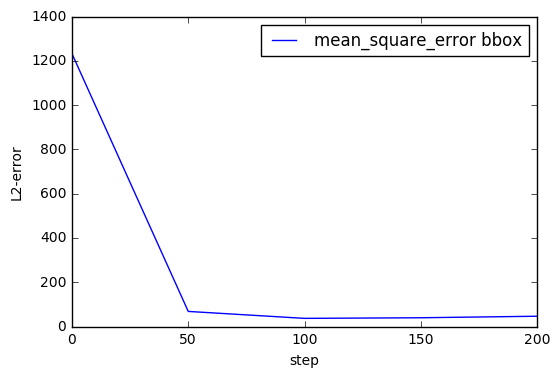

In [8]:
#loss function with training steps
plt.show()

- The model converges quickly based on the deescent of the cost fucntion


**Next making a predictor along with several useful functions for prediction**

- predict_with_model --> predicts bounding boxes for image based on 64, 64 coordinates

- format_image --> formats image for tensor flow
            1) Image to array
            2) Gaussian filtering
            3) Normalizing values
- image --> image to array

- predict_show_64 --> predict bounding box and display image on 64 x 64 coordinate

- predict_show --> predict boudning box and show on original image



In [30]:
def predict_with_model(y, model_name):

    test_dataset = y
 
    #parameters
    batch_size = 20
    image_size = 64
    patch_size = 3

    d1 = 4
    d2 = 8
    d3 = 16
    d4 = 32
    d5 = 64
    d6 = 128
    d7 = 256
    d8 = 512
    sdev = math.sqrt(2.0 / (32**2*1))


    #tensorflow computational graph
    graph = tf.Graph()
    with graph.as_default():

        # Input data.
        tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, image_size, image_size, 1))
        tf_train_bbox = tf.placeholder(tf.float32, shape=(batch_size,4))
        tf_eval = tf.placeholder(tf.float32,shape=(batch_size, image_size, image_size, 1))

        
        # Variables.
        conv1_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, 1, d1], stddev=sdev))
        conv1_b = tf.Variable(tf.zeros([d1]))
        
        conv2_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d1, d2], stddev=sdev))
        conv2_b = tf.Variable(tf.zeros([d2]))
        
        conv3_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d2, d3], stddev=sdev))
        conv3_b = tf.Variable(tf.zeros([d3]))
        
        conv4_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d3, d4], stddev=sdev))
        conv4_b = tf.Variable(tf.zeros([d4]))
        
        conv5_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d4, d5], stddev=sdev))
        conv5_b = tf.Variable(tf.zeros([d5]))
        
        conv6_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d5, d6], stddev=sdev))
        conv6_b = tf.Variable(tf.zeros([d6]))
        
        conv7_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d6, d7], stddev=sdev))
        conv7_b = tf.Variable(tf.zeros([d7]))
        
        conv8_w = tf.Variable(tf.truncated_normal([patch_size, patch_size, d7, d8], stddev=sdev))
        conv8_b = tf.Variable(tf.zeros([d8]))
        
        fc1_w = tf.Variable(tf.truncated_normal([128,512], stddev=0.1))
        fc1_b = tf.Variable(tf.constant(1.0, shape=[64]))

        #for final logits
        hidden2 = 512
        b1_w = tf.get_variable('b1_w', shape=[hidden2, 1],initializer=tf.contrib.layers.xavier_initializer())
        b1_b = tf.Variable(tf.constant(1.0, shape=[1]))
        b2_w = tf.get_variable('b2_w',shape=[hidden2, 1],initializer=tf.contrib.layers.xavier_initializer())
        b2_b = tf.Variable(tf.constant(1.0, shape=[1]))
        b3_w = tf.get_variable('b3_w',shape=[hidden2, 1],initializer=tf.contrib.layers.xavier_initializer())
        b3_b = tf.Variable(tf.constant(1.0, shape=[1]))
        b4_w = tf.get_variable('b4_w',shape=[hidden2, 1],initializer=tf.contrib.layers.xavier_initializer())
        b4_b = tf.Variable(tf.constant(1.0, shape=[1]))

        # Model.
        def model(data):
            '''
            Our best architecture consists of eight convolutional hidden layers
            one locally connected hidden layer, and two densely connected hidden layers.
            All connections are feedforward and go from one layer to the next (no skip connections).
            The first hidden layer contains maxout units (Goodfellow et al., 2013) (with three filters per unit)
            while the others contain rectifier units (Jarrett et al., 2009; Glorot et al., 2011). 
            The number of units at each spatial location in each layer is [48, 64, 128, 160] 
            for the first four layers and 192 for all other locally connected layers. 
            The fully connected layers contain 3,072 units each. 
            Each convolutional layer includes max pooling and subtractive normalization. 
            The max pooling window size is 2 × 2. 
            The stride alternates between 2 and 1 at each layer, 
            so that half of the layers don’t reduce the spatial size of the representation. 
            All convolutions use zero padding on the input to preserve representation size. 
            The subtractive normalization operates on 3x3 windows and preserves representation size. 
            All convolution kernels were of size 5 × 5. 
            We trained with dropout applied to all hidden layers but not the input.
            '''
            pad  = 'SAME'
            conv1 = tf.nn.conv2d(data, conv1_w, [1, 1, 1, 1], padding=pad)
            conv1 = tf.nn.relu(conv1 + conv1_b)
            conv1 = tf.nn.max_pool(conv1, [1,2,2,1], [1,2,2,1], padding=pad)
    #         print(conv1.get_shape())
            conv2 = tf.nn.conv2d(conv1, conv2_w, [1, 1, 1, 1], padding=pad)
            conv2 = tf.nn.relu(conv2 + conv2_b)
            conv2 = tf.nn.max_pool(conv2, [1,2,2,1], [1,2,2,1], padding=pad)
    #         print(conv2.get_shape())
            conv3 = tf.nn.conv2d(conv2, conv3_w, [1, 1, 1, 1], padding=pad)
            conv3 = tf.nn.relu(conv3 + conv3_b)
            conv3 = tf.nn.max_pool(conv3, [1,2,2,1], [1,2,2,1], padding=pad)
    #         print(conv3.get_shape())
            conv4 = tf.nn.conv2d(conv3, conv4_w, [1, 1, 1, 1], padding=pad)
            conv4 = tf.nn.relu(conv4 + conv4_b)
            conv4 = tf.nn.max_pool(conv4, [1,2,2,1], [1,2,2,1], padding=pad)
    #         print(conv4.get_shape())
            conv5 = tf.nn.conv2d(conv4, conv5_w, [1, 1, 1, 1], padding=pad)
            conv5 = tf.nn.relu(conv5 + conv5_b)
            conv5 = tf.nn.max_pool(conv5, [1,2,2,1], [1,2,2,1], padding=pad)
    #         print(conv5.get_shape())
            conv6 = tf.nn.conv2d(conv5, conv6_w, [1, 1, 1, 1], padding=pad)
            conv6 = tf.nn.relu(conv6 + conv6_b)
            conv6 = tf.nn.max_pool(conv6, [1,2,2,1], [1,2,2,1], padding=pad)
    #         print(conv6.get_shape())
            conv7 = tf.nn.conv2d(conv6, conv7_w, [1, 1, 1, 1], padding=pad)
            conv7 = tf.nn.relu(conv7 + conv7_b)
            conv7 = tf.nn.max_pool(conv7, [1,2,2,1], [1,2,2,1], padding=pad)
    #         print(conv7.get_shape())
            conv8 = tf.nn.conv2d(conv7, conv8_w, [1, 1, 1, 1], padding=pad)
            conv8 = tf.nn.relu(conv8 + conv8_b)
            conv8 = tf.nn.max_pool(conv8, [1,2,2,1], [1,2,2,1], padding=pad)
    #         print(conv8.get_shape())
        
            #bounding box
            shape_bb = conv8.get_shape().as_list()
            reshape_bb = tf.reshape(conv8, [shape_bb[0], shape_bb[1] * shape_bb[2] * shape_bb[3]])  
            fc1_bb = tf.nn.dropout(reshape_bb, keep_prob = 0.8)
            
            #four classifiers for the bounding box, locating the number in the image
            b1 = tf.matmul(fc1_bb, b1_w) + b1_b
            b2 = tf.matmul(fc1_bb, b2_w) + b2_b
            b3 = tf.matmul(fc1_bb, b3_w) + b3_b
            b4 = tf.matmul(fc1_bb, b4_w) + b4_b
            
            return [b1, b2, b3, b4]

        # Training computation. #no length logit
        [b1, b2, b3, b4] = model(tf_train_dataset)
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()

        #regression loss
        loss = tf.reduce_mean(tf.square(b1-tf_train_bbox[:,0])) +\
        tf.reduce_mean(tf.square(b2-tf_train_bbox[:,1])) +\
        tf.reduce_mean(tf.square(b3-tf_train_bbox[:,2])) +\
        tf.reduce_mean(tf.square(b4-tf_train_bbox[:,3]))
        
        # Optimizer.
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss) 
        
        # Predictions for the training and evaluation data
        train_prediction = tf.pack([b1, b2, b3, b4])
        
        eval_prediction = tf.pack([model(tf_eval)[0], model(tf_eval)[1], model(tf_eval)[2], model(tf_eval)[3]])

        test_prediction = tf.pack(model(test_dataset))
        
    with tf.Session(graph=graph) as sess:

        sess.run(tf.initialize_all_variables())
        saver.restore(sess, os.getcwd() + model_name)
        pred = test_prediction.eval()
        pred = [list(i) for i in zip(*[i.flatten() for i in pred])]

        return pred

def format_image(path, image_name):
    image_size = 64
    filename = path + '/' + image_name
    img = Image.open(filename)
    img = img.filter(ImageFilter.GaussianBlur(radius=3))
    img = misc.fromimage(img, flatten = True)
    img = np.array(img)
    img = misc.imresize(img, (image_size,image_size))
    img = img/float(img.max())*1. - (1./2.) #centering image around 0
    img = img.reshape((-1, image_size, image_size, 1)).astype(np.float32)    
    
    return img

def image(path, image_name):
    filename = path + '/' + image_name
    img = Image.open(filename)
    img = misc.fromimage(img, flatten = False)
    img = np.array(img)
    return img

# path = os.getcwd()
# file_names = ['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg', 'image5.jpg','image7.png', 'image8.jpg']
# # file_names = ['image7.png']

def predict_show_64(img, show = True):

    #loading image
    label = predict_with_model(img, model_name)
    print(label[0])
    label = label[0]
    
    # Create figure and axes
    fig,ax = plt.subplots(1)
    ax.imshow(img[0,:,:,0])
    
    # Create a Rectangle patch
    y_top = float(label[0])
    x_top = float(label[2])
    height = float(label[0]-label[1])
    width = float(label[3]-label[2])
    rect = patches.Rectangle((x_top,y_top), width, -height, linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()

    if show == True:
        plt.show()  
        
def predict_show(file_name, model_name, show = True):

    path = os.getcwd()
    img = format_image(path, file_name)
    img_big = image(path, file_name)
    label = predict_with_model(img, model_name)
    print(label[0])

    label = label[0]

    # Create figure and axes
    fig,ax = plt.subplots(1)
    ax.imshow(img_big)
    # Create a Rectangle patch
    y_top = float(label[0])* float(img_big.shape[0]/64. )
    x_top = float(label[2])* float(img_big.shape[1]/64. )
    height = float(label[0]-label[1]) * img_big.shape[0]/64. 
    width = float(label[3]-label[2])  * img_big.shape[1]/64.
    rect = patches.Rectangle((x_top,y_top), width, -height, linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

    if show == True:
        plt.show() 

**Now testing bounding box prediction on some of the test dataset that the model has not seen**

[7.4067316, 55.271896, 25.339523, 40.063412]


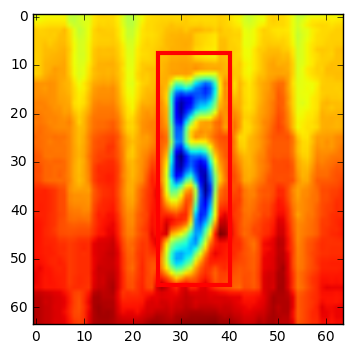

[8.1318016, 53.961201, 22.568052, 38.201653]


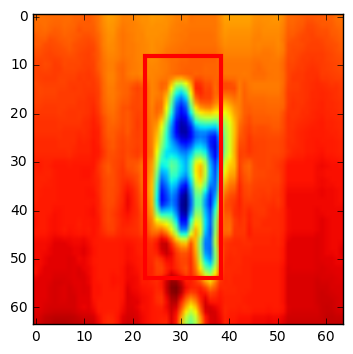

[10.398603, 50.078323, 21.142565, 37.713253]


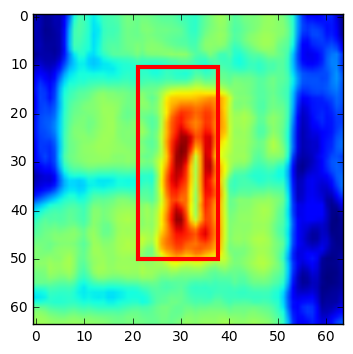

[10.077092, 53.391483, 22.937439, 41.436749]


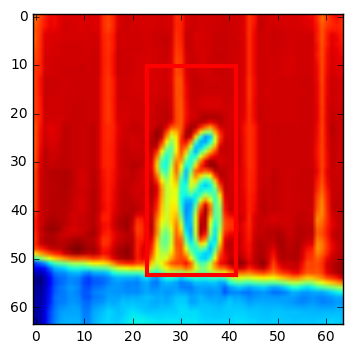

[11.573496, 55.992359, 24.597221, 42.171921]


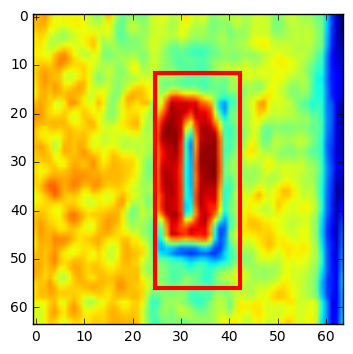

In [27]:
import matplotlib.patches as patches

path = os.getcwd()
model_name = '/STEP4_model_bbox.ckpt'


for i in [0, 301, 35, 20, 500]:
    predict_show_64(test_dataset[i:i+1,:,:,:], show = True)


** next testing bounding box prediction on images not in the SVHN **

[9.3967829, 42.309757, 20.704889, 29.95603]


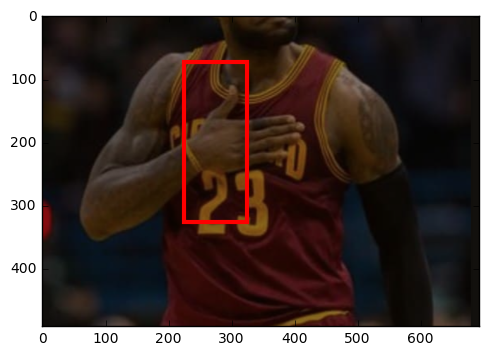

[8.6636515, 48.437428, 18.829464, 36.718643]


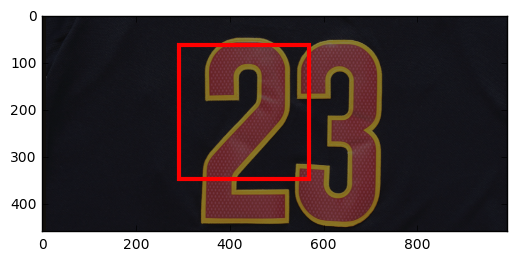

[5.0150685, 47.781136, 21.23695, 33.637936]


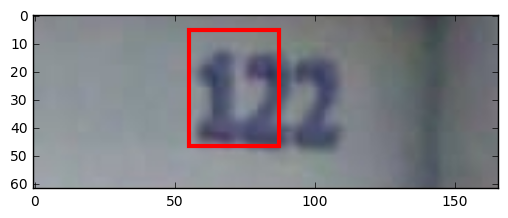

[8.0504141, 47.90818, 20.678301, 36.930931]


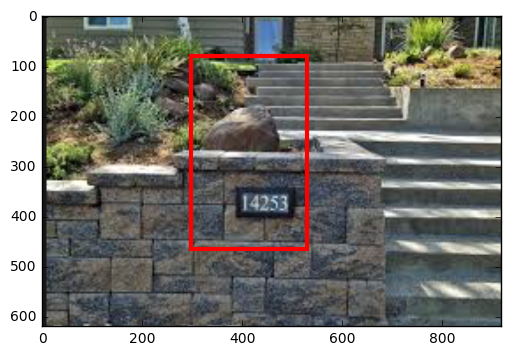

[9.2739143, 47.643768, 22.641184, 33.415615]


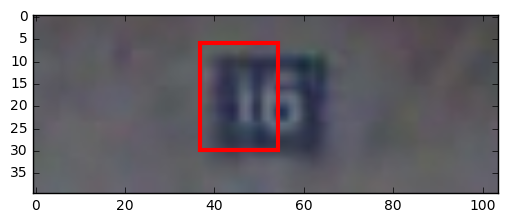

In [31]:

model_name = '/STEP4_model_bbox.ckpt'

for i in ['image1.png', 'image2.png', 'image7.png', 'image9.png',  '22.png' ]:
    predict_show(i, model_name, show = True)

** now writing a function to predict the digit for some of the test images**

The model does the following:

    1) localizes the digit using the regression classifier CNN
    2) crops the image and resizes for tensorflow
    3) predict the digit using the already trained model in step 2, where I trained on perfectly cropped digits.

In [21]:
import STEP3_Model_Predict as model

def predict_with_bb(img):
    
    #predict bounding boxes
    path = os.getcwd()
    model_name = '/STEP4_model_bbox.ckpt'
    bb_labels = predict_with_model(img, model_name)[0]
    bb_labels = [int(i) for i in bb_labels]
    #crop
    img = img[:, bb_labels[0]:bb_labels[1], bb_labels[2]:bb_labels[3], :]
    
    #resize to 64 x 64
    img = img[0, :, :, 0]
    img = misc.imresize(img, (32,32))
    
    #reformat for tensorflow
    img = img.reshape((-1, 32, 32, 1)).astype(np.float32)  
    
    #predict with model trained on cropped image
    digits = model.predict_with_model(img, '/STEP2_2_model.ckpt')

    return digits



predicted =  [ 5 10 10 10 10]
true label =  [ 5 10 10 10 10]


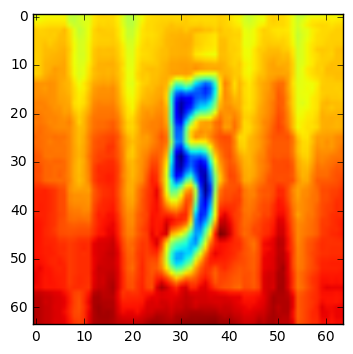

predicted =  [ 3  5  0 10 10]
true label =  [ 4  7 10 10 10]


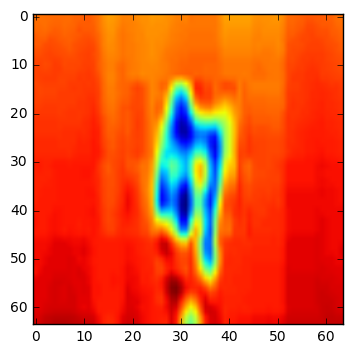

predicted =  [ 1  0 10 10 10]
true label =  [ 4 10 10 10 10]


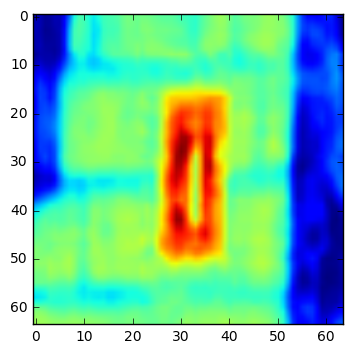

predicted =  [ 8  6 10 10 10]
true label =  [ 1  6 10 10 10]


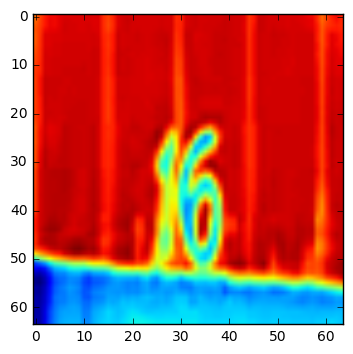

predicted =  [ 1  2  9 10 10]
true label =  [ 1 10 10 10 10]


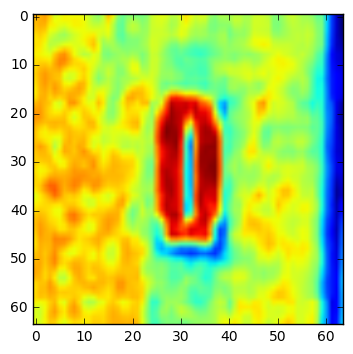

In [24]:
for i in [0, 301, 35, 20, 500]:
    image = test_dataset[i:i+1,:,:,:]
    print('predicted = ', predict_with_bb(image))
    print('true label = ', test_labels[i][1:])
    plt.imshow(image[0,:,:,0])
    plt.show()

### Question 10
_How well does your model localize numbers on the testing set from the realistic dataset? Do your classification results change at all with localization included?_

**Answer:**

I decided to keep things simple.  I trained the same model with four regression values (b1, b2, b3, b4) for each corner of the digit. The prediction of the bounding box worked well for the training and test data.  Examples above.  Also it surprisingly trained very fast.  

Because, In step 2 I cropped the images first.  I can only expect to do as well as that assuming my bouding box prediction is 100% accurate.  But the model performs much better on images without cropping at all.  

I could further improve, by including bounding boxes for each digit instead of the four corners around the digit.

Also, I think preprocessing better with whitening or soemthing would probably help too.  ALot fo the images I used are alot are busier than the SVHN set.  There are alot of other potential refinements, regularization etc.  This is a hard problem. 

### Question 11
_Test the localization function on the images you captured in **Step 3**. Does the model accurately calculate a bounding box for the numbers in the images you found? If you did not use a graphical interface, you may need to investigate the bounding boxes by hand._ Provide an example of the localization created on a captured image.

** Now for the images that found and have been using**

predicted =  [ 2  2 10 10 10]


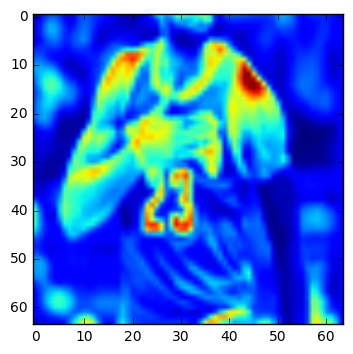

predicted =  [ 9  4 10 10 10]


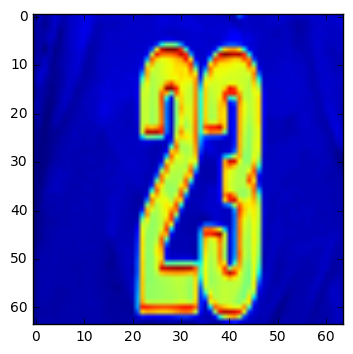

predicted =  [ 1  1 10 10 10]


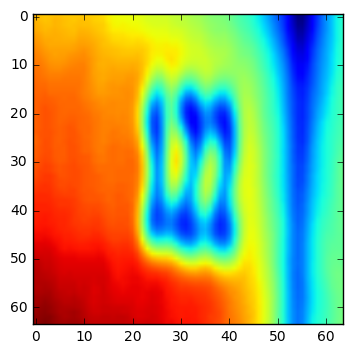

predicted =  [ 4 10 10 10 10]


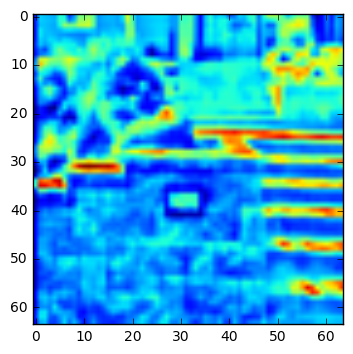

predicted =  [ 1  5  6 10 10]


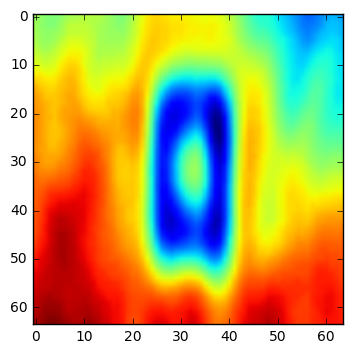

In [27]:
for i in ['image1.png', 'image2.png', 'image7.png', 'image9.png',  '22.png' ]:
    image = format_image(os.getcwd(), i)
    print('predicted = ', predict_with_bb(image))
    plt.imshow(image[0,:,:,0])
    plt.show()


**Answer:**

In the few test images that the model had not seen during training. It did ok comparitively to before, where without cropping the model performed very poorly.  Now at this point it is starting to get close, by first localizing the digit, cropping automatically and then prediciting using the original model. It may also be important to use higher resulution of the images as well, it looks like some of the numbers may be getting blurred out.

----
## Optional Step 5: Build an Application or Program for a Model
Take your project one step further. If you're interested, look to build an Android application or even a more robust Python program that can interface with input images and display the classified numbers and even the bounding boxes. You can for example try to build an augmented reality app by overlaying your answer on the image like the [Word Lens](https://en.wikipedia.org/wiki/Word_Lens) app does.

Loading a TensorFlow model into a camera app on Android is demonstrated in the [TensorFlow Android demo app](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android), which you can simply modify.

If you decide to explore this optional route, be sure to document your interface and implementation, along with significant results you find. You can see the additional rubric items that you could be evaluated on by [following this link](https://review.udacity.com/#!/rubrics/413/view).

### Optional Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:


### Your optional code implementation goes here.
### Feel free to use as many code cells as needed.



### Documentation
Provide additional documentation sufficient for detailing the implementation of the Android application or Python program for visualizing the classification of numbers in images. It should be clear how the program or application works. Demonstrations should be provided. 

_Write your documentation here._

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.